# TD 5

In [1]:
try:
    import pandas as pd
    from matplotlib import pyplot as plt
except:
    ! pip install pandas && pip install matplotlib

# PANDAS

## import the csv

In [2]:
schema = {'ID': 'i', "TITLE": 'U',
          'RUNTIME': 'i', 
          'YEAR': 'i',
          'RANK': 'i'}

In [3]:
movies = pd.read_csv('movies.csv', sep=';', dtype=schema)
# movies['RUNTIME'] = pd.to_timedelta(movies['RUNTIME'])
# movies['YEAR'] = pd.to_datetime(movies['RUNTIME'])
movies.head()

,ID,TITLE,YEAR,RUNTIME,RANK
0,2065,The Treasure of the Sierra Madre,1948,126,66
1,2115,Million Dollar Baby,2004,132,116
2,2089,No Country for Old Men,2007,122,90
3,2009,Star Wars : Episode V - The Empire Strikes Back,1980,190,10
4,2070,Singin' in the Rain,1952,103,71


In [4]:
movies.dtypes

ID          int32
TITLE      object
YEAR        int32
RUNTIME     int32
RANK        int32
dtype: object

In [5]:
print(movies)

       ID                                            TITLE  YEAR  RUNTIME  \
0    2065                 The Treasure of the Sierra Madre  1948      126   
1    2115                              Million Dollar Baby  2004      132   
2    2089                           No Country for Old Men  2007      122   
3    2009  Star Wars : Episode V - The Empire Strikes Back  1980      190   
4    2070                              Singin' in the Rain  1952      103   
..    ...                                              ...   ...      ...   
206  2143                              The Grapes of Wrath  1940      190   
207  2010                                  The Dark Knight  2008      152   
208  2197                              Anatomy of a Murder  1959      160   
209  2164                                  Rosemary's Baby  1968      136   
210  2091                           For a Few Dollars More  1965      132   

     RANK  
0      66  
1     116  
2      90  
3      10  
4      71  
.. 

## calculate statistc values

In [6]:
# nb lines
movies.size

1055

In [7]:
# most recent year
# movies.YEAR.dt.year.max()
movies.YEAR.max()

2010

In [8]:
# runtime mean
rt_mean = movies.RUNTIME.mean()
rt_mean

140.4218009478673

## Filter

In [9]:
# rank less than 20
movies[movies['RANK'] <= 20]

,ID,TITLE,YEAR,RUNTIME,RANK
3,2009,Star Wars : Episode V - The Empire Strikes Back,1980,190,10
10,2006,Schindler's List,1993,190,7
13,2004,"The Good,the Bad and the Ugly",1966,190,5
22,2001,The Godfather,1972,175,2
29,2014,Toy Story 3,2010,103,15
35,2013,Star Wars : Episode IV - A New Hope,1977,190,14
53,2002,The Godfather Part II,1974,200,3
57,2019,The Lord of the Rings : The Fellowship of the ...,2001,190,20
58,2008,One Flew Over the Cuckoo's Nest,1975,133,9
63,2015,Casablanca,1942,102,16


In [10]:
# Films longer than average
movies[movies.RUNTIME >= rt_mean]

,ID,TITLE,YEAR,RUNTIME,RANK
3,2009,Star Wars : Episode V - The Empire Strikes Back,1980,190,10
10,2006,Schindler's List,1993,190,7
11,2126,Gone with the Wind,1939,190,127
13,2004,"The Good,the Bad and the Ugly",1966,190,5
17,2034,Forrest Gump,1994,142,35
...,...,...,...,...,...
199,2030,The Lord of the Rings : The Two Towers,2002,190,31
205,2199,Roman Holiday,1953,190,200
206,2143,The Grapes of Wrath,1940,190,144
207,2010,The Dark Knight,2008,152,11


In [11]:
# Title contains 'Wars'
contain_wars = movies.TITLE.str.contains('Wars')
movies[contain_wars]

,ID,TITLE,YEAR,RUNTIME,RANK
3,2009,Star Wars : Episode V - The Empire Strikes Back,1980,190,10
27,2076,Star Wars : Episode VI - Return of the Jedi,1983,190,77
35,2013,Star Wars : Episode IV - A New Hope,1977,190,14


## Sort

In [12]:
# Afficher les films triés par ordre croissants de rang et prendre les dix premières lignes.
movies.sort_values(by='RANK').head(10)

,ID,TITLE,YEAR,RUNTIME,RANK
125,2000,The Shawshank Redemption,1994,142,1
22,2001,The Godfather,1972,175,2
53,2002,The Godfather Part II,1974,200,3
182,2003,Inception,2010,148,4
13,2004,"The Good,the Bad and the Ugly",1966,190,5
108,2005,Pulp Fiction,1994,190,6
10,2006,Schindler's List,1993,190,7
64,2007,12 Angry Men,1957,96,8
58,2008,One Flew Over the Cuckoo's Nest,1975,133,9
3,2009,Star Wars : Episode V - The Empire Strikes Back,1980,190,10


In [13]:
# Afficher les films triés par ordre décroissant d’années et prendre les lignes 10 à 20.
movies.sort_values(by='YEAR', ascending=False)[10:20]

,ID,TITLE,YEAR,RUNTIME,RANK
62,2082,Slumdog Millionaire,2008,120,83
21,2118,The Wrestler,2008,109,119
207,2010,The Dark Knight,2008,152,11
132,2172,Let the Right One In,2008,115,173
7,2159,In Bruges,2008,107,160
49,2140,Ratatouille,2007,111,141
89,2124,The Bourne Ultimatum,2007,115,125
180,2166,The Diving Bell and the Butterfly,2007,112,167
44,2109,There Will Be Blood,2007,158,110
80,2113,Into the Wild,2007,148,114


## Aggrégats

In [14]:
# Compter le nombre de films par années.
movies.groupby('YEAR').count()['TITLE']

YEAR
1921    1
1925    1
1926    1
1927    1
1931    1
       ..
2006    6
2007    6
2008    7
2009    5
2010    3
Name: TITLE, Length: 80, dtype: int64

In [15]:
# Compter la durée moyenne des films par année
movies.groupby('YEAR')['RUNTIME'].mean()


YEAR
1921     54.000000
1925    190.000000
1926    190.000000
1927    106.000000
1931     99.000000
           ...    
2006    128.500000
2007    127.666667
2008    120.285714
2009    142.200000
2010    116.333333
Name: RUNTIME, Length: 80, dtype: float64

# MATPLOTLIB

## Film number by decade

In [38]:
mvs = movies.copy()
mvs.YEAR = mvs.YEAR//10*10
mv_decade = mvs.groupby('YEAR')

In [39]:
mv_decade_rt = mv_decade['ID'].count()
mv_decade_rt

YEAR
1920     4
1930     9
1940    16
1950    27
1960    23
1970    21
1980    22
1990    35
2000    51
2010     3
Name: ID, dtype: int64

<AxesSubplot:xlabel='YEAR', ylabel='Film number'>

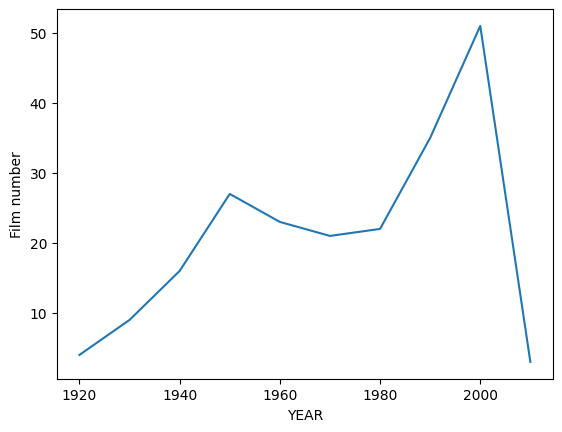

In [40]:
mv_decade_rt.plot(x='Year', ylabel='Film number')

## Average rank by decade

<AxesSubplot:xlabel='YEAR', ylabel='RANK'>

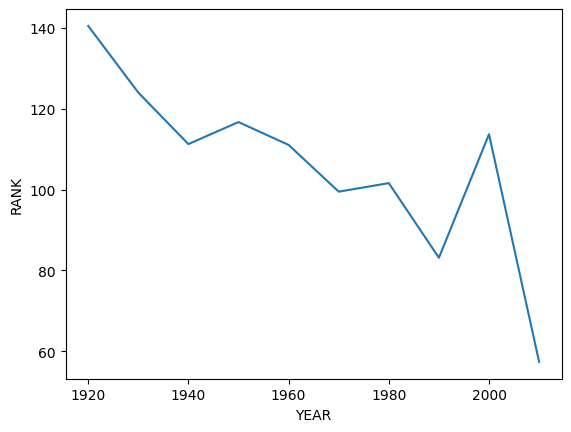

In [41]:
mv_decade_rk = mv_decade['RANK'].mean()
mv_decade_rk.plot(ylabel='RANK')

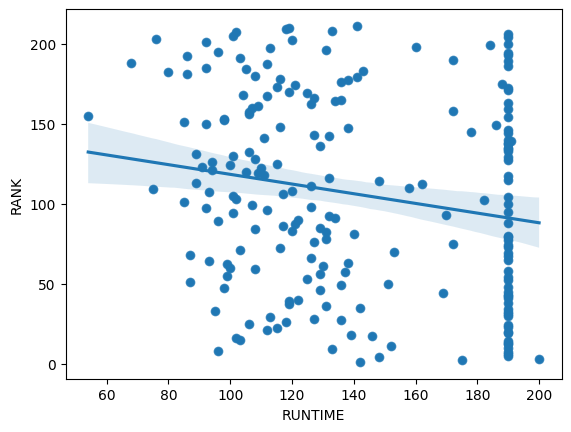

In [45]:
import seaborn as sns
ax = sns.regplot(x='RUNTIME', y='RANK', data=mvs)
ax = mvs.plot.scatter(x='RUNTIME', y='RANK', ax=ax)

That indicates there is no correlation between `RUNTIME` and `RANK`.